In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname = './malgun.ttf').get_name()    
plt.rcParams['font.family'] = font_name
plt.style.use('dark_background')
plt.rcParams.update({'font.size': 15})
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]


In [18]:
# df = pd.read_csv("./data/OBS_ASOS_TIM_20220815084124.csv", encoding='euc-kr') ## 1 week data (from 08-14 of August)

df = pd.read_csv("./data/OBS_ASOS_MNH_20220815103633.csv", encoding='euc-kr') ## 1 month data (from May->August)

df.head()

,지점,지점명,일시,평균기온(°C),평균최고기온(°C),평균최저기온(°C),최고기온(°C),최저기온(°C),최고기온 나타난날(yyyymmdd),최저기온 나타난날(yyyymmdd),...,평균지면온도(°C),0.05m평균지중온도(°C),0.1m평균지중온도(°C),0.2m평균지중온도(°C),0.3m평균지중온도(°C),0.5m평균지중온도(°C),1.0m평균지중온도(°C),1.5m평균지중온도(°C),3.0m평균지중온도(°C),5.0m평균지중온도(°C)
0,90,속초,2022-05,18.5,23.7,13.1,33.5,5.8,20220528,20220502,...,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,90,속초,2022-06,20.9,24.7,17.6,34.6,10.1,20220625,20220608,...,24.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,90,속초,2022-07,24.3,27.7,21.9,33.4,18.8,20220708,20220723,...,28.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,90,속초,2022-08,NaN,NaN,NaN,35.5,20.3,20220806,20220810,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,93,북춘천,2022-05,17.2,25.0,9.4,30.7,2.4,20220524,20220501,...,22.7,21.0,21.0,20.7,20.2,19.2,16.9,14.7,11.8,11.5


In [19]:
cols = list(df.columns)
print(f"There are {len(cols)} columns")

There are 69 columns


In [20]:
translate_cols_1_week_data =  [ "Branch", 
                    "Branch name",
                    "Date and Time", 
                    "Temperature(°C)",
                    "Temperature QC Flag",
                    "precipitation(mm)",
                    "Precipitation QC flag",
                    "wind speed(m/s)",
                    "Wind speed QC flag",
                    "Wind Direction(16 directions)",
                    "Wind direction QC flag", 
                    "Humidity(%)",
                    "Humidity QC flag",
                    'Vapor pressure(hPa)',
                    'Dew Point Temperature(°C)',
                    'Local air pressure(hPa)',
                    'Local Barometric Pressure QC Flag',
                    "Air pressure at sea(hPa)",
                    "Spong Barometric Pressure QC Flag",
                    'Daylight(hr)',
                    "Sunlight QC Flag",
                    'Sunshine(MJ/m2)',
                    "Sunshine QC Flag",
                    "Snowfall(cm)",
                    "Three-hour new theory(cm)",
                    "Total cloud volume(10th quartile)",
                    "Middle and low-order cloud(10th-quartile)",
                    'Woonhyeong(Old form abbreviation))',
                    "Minimum cargo(100m)",
                    "Visibility(10m)",
                    'ground status(ground status code)',
                    'Development number(domestic)',
                    'ground temperature(°C)',
                    'ground temperature QC flag',
                    '5 cm underground temperature(°C)',
                    '10cm underground temperature(°C)',
                    "20 cm Underground Temperature(°C)",
                    "30cm underground temperature(°C)",
                  ]

translate_cols_1_week_data = list(map(lambda s: s.lower().replace(" ", "_"), translate_cols_1_week_data))
len(translate_cols_1_week_data)

38

In [21]:
translate_cols =  [ "Point",
                    "Region name",
                    "Date",
                    "Average temperature",
                    "Average Maximum Temperature",
                    "Average Lowest Temperature",
                    "Maximum temperature",
                    "Minimum temperature",
                    "The day when the highest temperature appeared (yyyyymmdd)",
                    "The day when the lowest temperature appeared (yyyyymmdd)",
                    "Average local pressure (hPa)",
                    "Average sea pressure (hPa)",
                    "Maximum sea pressure (hPa)",
                    "Minimum sea pressure (hPa)",
                    "Maximum sea pressure day (yyyyymmdd)",
                    "Minimum sea pressure day (yyyyymmdd)",
                    "Average water vapor pressure (hPa)",
                    "Maximum water vapor pressure (hPa)",
                    "Minimum water vapor pressure (hPa)",
                    "Maximum water vapor pressure day (yyyyymmdd)",
                    "Minimum water vapor pressure day (yyyyymmdd)",
                    "Average dew point temperature (°C)",
                    "Average Relative Humidity (%)",
                    "Minimum relative humidity (%)",
                    "Minimum Relative Humidity Day (yyyyymmdd)",
                    "Monthly precipitation (00 to 24h only) (mm)",
                    "Maximum daily precipitation (mm)",
                    "Maximum precipitation per hour (mm)",
                    "Maximum precipitation for 10 minutes (mm)",
                    "The day when the highest daily precipitation appeared (yyyyymmdd)",
                    "The day when the highest precipitation for an hour appeared (yyyyymmdd)",
                    "10 min maximum precipitation day (yyyyymmdd)",
                    "Small total evaporation (mm)",
                    "Small daily maximum evaporation (mm)",
                    "Large total evaporation amount (mm)",
                    "Large daily maximum evaporation (mm)",
                    "Small daily maximum evaporation date (yyyyymmdd)",
                    "Large daily maximum evaporation date (yyyyymmdd)",
                    "Average wind speed (m/s)",
                    "Maximum wind speed (m/s)",
                    "Maximum instantaneous wind speed (m/s)",
                    "Maximum wind speed wind direction (16 directions)",
                    "Maximum instantaneous wind speed wind direction (16 directions)",
                    "Maximum wind speed day (yyyyymmdd)",
                    "Maximum instantaneous wind speed day (yyyyymmdd)",
                    "Highest wind direction (16 directions)",
                    "Average luck (1/10)",
                    "Average middle and lower floor cloud (1/10)",
                    "Total sunlight hours (hr)",
                    "Sunlight rate (%)",
                    "Total solar radiation (MJ/m2)",
                    "Deepest snow (cm)",
                    "Deepest and thin snow (cm)",
                    "3 hours new snowflake (cm)",
                    "The day when the deepest snowfall appeared (yyyyymmdd)",
                    "The day when the most recent snowstorm appeared (yyyyymmdd)",
                    "Average minimum phase temperature",
                    "Minimum phase temperature",
                    "The day when the minimum phase temperature appeared (yyyyymmdd)",
                    "Average ground temperature",
                    "0.05 m average ground temperature",
                    "0.1 m average ground temperature",
                    "0.2 m average ground temperature",
                    "0.3 m average ground temperature",
                    "0.5 m average ground temperature",
                    "1.0 m average ground temperature",
                    "1.5 m average ground temperature",
                    "3.0 m average ground temperature",
                    "5.0 m average ground temperature",
                ]

translate_cols = list(map(lambda s: s.lower().replace(" ", "_"), translate_cols))
len(translate_cols)

69

In [22]:
df.columns = translate_cols
df.head()

,point,region_name,date,average_temperature,average_maximum_temperature,average_lowest_temperature,maximum_temperature,minimum_temperature,the_day_when_the_highest_temperature_appeared_(yyyyymmdd),the_day_when_the_lowest_temperature_appeared_(yyyyymmdd),...,average_ground_temperature,0.05_m_average_ground_temperature,0.1_m_average_ground_temperature,0.2_m_average_ground_temperature,0.3_m_average_ground_temperature,0.5_m_average_ground_temperature,1.0_m_average_ground_temperature,1.5_m_average_ground_temperature,3.0_m_average_ground_temperature,5.0_m_average_ground_temperature
0,90,속초,2022-05,18.5,23.7,13.1,33.5,5.8,20220528,20220502,...,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,90,속초,2022-06,20.9,24.7,17.6,34.6,10.1,20220625,20220608,...,24.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,90,속초,2022-07,24.3,27.7,21.9,33.4,18.8,20220708,20220723,...,28.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,90,속초,2022-08,NaN,NaN,NaN,35.5,20.3,20220806,20220810,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,93,북춘천,2022-05,17.2,25.0,9.4,30.7,2.4,20220524,20220501,...,22.7,21.0,21.0,20.7,20.2,19.2,16.9,14.7,11.8,11.5


In [23]:
df.describe()

,point,average_temperature,average_maximum_temperature,average_lowest_temperature,maximum_temperature,minimum_temperature,the_day_when_the_highest_temperature_appeared_(yyyyymmdd),the_day_when_the_lowest_temperature_appeared_(yyyyymmdd),average_local_pressure_(hpa),average_sea_pressure_(hpa),...,average_ground_temperature,0.05_m_average_ground_temperature,0.1_m_average_ground_temperature,0.2_m_average_ground_temperature,0.3_m_average_ground_temperature,0.5_m_average_ground_temperature,1.0_m_average_ground_temperature,1.5_m_average_ground_temperature,3.0_m_average_ground_temperature,5.0_m_average_ground_temperature
count,380.000000,285.000000,285.000000,285.000000,380.000000,380.000000,3.800000e+02,3.800000e+02,285.000000,285.000000,...,285.000000,84.000000,84.000000,84.000000,84.000000,39.000000,39.000000,39.000000,39.000000,39.000000
mean,197.347368,22.123158,27.338596,17.552632,32.892105,14.838947,2.022067e+07,2.022066e+07,996.902807,1008.645614,...,26.455439,24.848810,24.379762,23.977381,23.503571,22.787179,20.607692,18.692308,15.620513,14.728205
std,64.428933,3.459660,2.796751,4.775034,2.375755,7.323815,1.053953e+02,1.162750e+02,14.175924,2.816480,...,2.686799,2.986778,3.084035,3.132586,3.203629,3.260625,3.260722,3.085994,2.408120,1.589430
min,90.000000,13.400000,18.200000,6.100000,22.900000,-2.700000,2.022051e+07,2.022050e+07,922.000000,1004.200000,...,17.400000,19.000000,18.200000,18.200000,17.400000,16.600000,15.200000,13.300000,11.600000,11.500000
25%,136.000000,18.800000,25.200000,13.600000,31.500000,8.850000,2.022058e+07,2.022058e+07,992.800000,1006.300000,...,24.500000,22.650000,21.850000,21.550000,20.900000,20.000000,17.850000,16.550000,13.950000,13.450000
50%,202.000000,22.500000,27.400000,18.600000,33.200000,16.050000,2.022067e+07,2.022066e+07,1001.000000,1007.600000,...,26.500000,24.550000,24.150000,23.800000,23.550000,22.800000,20.600000,19.100000,15.600000,15.000000
75%,258.000000,25.500000,29.800000,21.900000,34.700000,21.000000,2.022075e+07,2.022075e+07,1004.600000,1011.900000,...,28.600000,27.625000,27.150000,26.900000,26.400000,25.300000,23.000000,20.650000,17.400000,16.050000
max,295.000000,28.400000,32.700000,25.700000,37.900000,27.000000,2.022081e+07,2.022081e+07,1013.300000,1014.500000,...,32.500000,30.400000,30.600000,30.600000,30.200000,29.500000,27.200000,24.800000,22.000000,17.700000


In [24]:
# Percent of NaN values in each column
round(df.isnull().sum()/len(df)*100, 2)

point                                0.00
region_name                          0.00
date                                 0.00
average_temperature                 25.00
average_maximum_temperature         25.00
                                    ...  
0.5_m_average_ground_temperature    89.74
1.0_m_average_ground_temperature    89.74
1.5_m_average_ground_temperature    89.74
3.0_m_average_ground_temperature    89.74
5.0_m_average_ground_temperature    89.74
Length: 69, dtype: float64

## Note

- QC stands for quality control
- All the temperature related attribute are in celcius degree
- All the  precipitation related attribute are in mm


In [25]:
regions = df.region_name.unique()
print("Number of region listed: ", len(regions)) # Should there only be 85 cities ? 
regions 

Number of region listed:  95


array(['속초', '북춘천', '철원', '동두천', '파주', '대관령', '춘천', '백령도', '북강릉', '강릉',
       '동해', '서울', '인천', '원주', '울릉도', '수원', '영월', '충주', '서산', '울진', '청주',
       '대전', '추풍령', '안동', '상주', '포항', '군산', '대구', '전주', '울산', '창원', '광주',
       '부산', '통영', '목포', '여수', '흑산도', '완도', '고창', '순천', '홍성', '제주', '고산',
       '성산', '서귀포', '진주', '강화', '양평', '이천', '인제', '홍천', '태백', '정선군', '제천',
       '보은', '천안', '보령', '부여', '금산', '세종', '부안', '임실', '정읍', '남원', '장수',
       '고창군', '영광군', '김해시', '순창군', '북창원', '양산시', '보성군', '강진군', '장흥', '해남',
       '고흥', '의령군', '함양군', '광양시', '진도군', '봉화', '영주', '문경', '청송군', '영덕',
       '의성', '구미', '영천', '경주시', '거창', '합천', '밀양', '산청', '거제', '남해'],
      dtype=object)

In [26]:
## Rename 2 columns and convert data to Date only
def convertToDay(n):
    strN = str(n)
    return strN[6:]

def renameAndConvert(_df):
    _df = _df.rename(columns={'the_day_when_the_highest_temperature_appeared_(yyyyymmdd)':'peak_temperature_day', 
                              'the_day_when_the_lowest_temperature_appeared_(yyyyymmdd)':'lowest_temperature_day',
                              'monthly_precipitation_(00_to_24h_only)_(mm)':'monthly_precipitation',
                              'maximum_daily_precipitation_(mm)': 'maximum_daily_precipitation',
                              'maximum_precipitation_per_hour_(mm)': 'maximum_precipitation_per_hour',
                              'maximum_precipitation_for_10_minutes_(mm)': 'maximum_precipitation_for_10_minutes',
                              'the_day_when_the_highest_daily_precipitation_appeared_(yyyyymmdd)' : 'highest_daily_precipitation_day',
                              'the_day_when_the_highest_precipitation_for_an_hour_appeared_(yyyyymmdd)': '1_hour_highest_precipitation_day',
                              '10_min_maximum_precipitation_day_(yyyyymmdd)':'10_min_maximum_precipitation_day'
                             })
    _df.peak_temperature_day = _df.peak_temperature_day.apply(convertToDay)
    _df.lowest_temperature_day = _df.lowest_temperature_day.apply(convertToDay)
    _df.highest_daily_precipitation_day = _df.highest_daily_precipitation_day.apply(convertToDay)
    _df["1_hour_highest_precipitation_day"] = _df["1_hour_highest_precipitation_day"].apply(convertToDay)
    _df["10_min_maximum_precipitation_day"] = _df["10_min_maximum_precipitation_day"].apply(convertToDay)
    return _df

df = renameAndConvert(df)
df.head()

,point,region_name,date,average_temperature,average_maximum_temperature,average_lowest_temperature,maximum_temperature,minimum_temperature,peak_temperature_day,lowest_temperature_day,...,average_ground_temperature,0.05_m_average_ground_temperature,0.1_m_average_ground_temperature,0.2_m_average_ground_temperature,0.3_m_average_ground_temperature,0.5_m_average_ground_temperature,1.0_m_average_ground_temperature,1.5_m_average_ground_temperature,3.0_m_average_ground_temperature,5.0_m_average_ground_temperature
0,90,속초,2022-05,18.5,23.7,13.1,33.5,5.8,28,02,...,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,90,속초,2022-06,20.9,24.7,17.6,34.6,10.1,25,08,...,24.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,90,속초,2022-07,24.3,27.7,21.9,33.4,18.8,08,23,...,28.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,90,속초,2022-08,NaN,NaN,NaN,35.5,20.3,06,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,93,북춘천,2022-05,17.2,25.0,9.4,30.7,2.4,24,01,...,22.7,21.0,21.0,20.7,20.2,19.2,16.9,14.7,11.8,11.5


In [27]:
## Drop columns with more than 5% of data is NaN values.

isNan = round(df.isnull().sum()/len(df)*100, 2)
isNan.drop(isNan[isNan < 5].index, inplace=True) 
dropCols = list(isNan.index)
dropCols.append("point") ## don't understand the meaning of this column 

df_short = df.drop(dropCols, axis=1)
print(f"{len(dropCols)} columns are dropped: ")
df_short.head()

35 columns are dropped: 


,region_name,date,maximum_temperature,minimum_temperature,peak_temperature_day,lowest_temperature_day,maximum_sea_pressure_(hpa),minimum_sea_pressure_(hpa),maximum_sea_pressure_day_(yyyyymmdd),minimum_sea_pressure_day_(yyyyymmdd),...,maximum_instantaneous_wind_speed_(m/s),maximum_wind_speed_wind_direction_(16_directions),maximum_instantaneous_wind_speed_wind_direction_(16_directions),maximum_wind_speed_day_(yyyyymmdd),maximum_instantaneous_wind_speed_day_(yyyyymmdd),highest_wind_direction_(16_directions),total_sunlight_hours_(hr),sunlight_rate_(%),minimum_phase_temperature,the_day_when_the_minimum_phase_temperature_appeared_(yyyyymmdd)
0,속초,2022-05,33.5,5.8,28,02,1022.7,997.0,20220508,20220527,...,15.9,270,290,20220507,20220504,270,312.7,70.76,5.9,20220502
1,속초,2022-06,34.6,10.1,25,08,1016.5,991.1,20220611,20220624,...,14.7,110,250,20220606,20220628,140,169.6,38.26,9.0,20220608
2,속초,2022-07,33.4,18.8,08,23,1014.9,996.8,20220729,20220716,...,10.3,360,360,20220714,20220714,140,135.5,30.07,19.8,20220723
3,속초,2022-08,35.5,20.3,06,10,1009.7,1001.8,20220804,20220808,...,9.9,360,360,20220805,20220805,140,71.4,39.36,20.3,20220810
4,북춘천,2022-05,30.7,2.4,24,01,1022.4,998.6,20220508,20220527,...,15.6,230,230,20220501,20220501,200,281.3,63.79,-10.2,20220526


## Plot some graphs

Base on plot below, May still has cool weather while July is the hottest month during the summer.

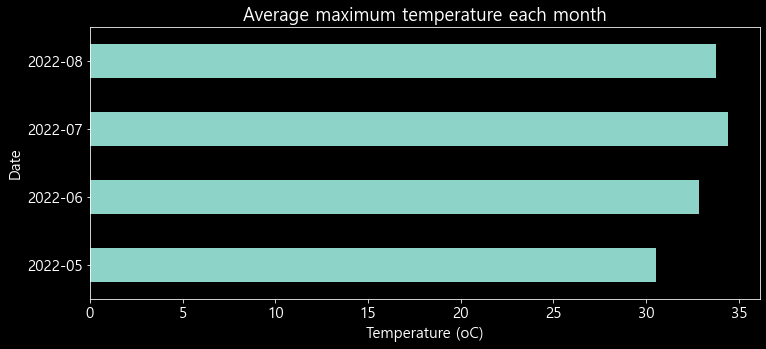

In [28]:
df_short.groupby("date").maximum_temperature.mean().plot(kind="barh", 
                                                                  figsize= (12,5), 
                                                                  title="Average maximum temperature each month",)
plt.xlabel('Temperature (oC)')
plt.ylabel('Date')
plt.show()

### Where to go in the summer ?

Top 10 hottest regions during summer in Korea are: ['대구', '제주', '청주', '밀양', '북창원', '대전', '구미', '강릉', '포항', '양산시']


Top 10 coolest regions during summer in Korea are: ['대관령', '태백', '백령도', '봉화', '흑산도', '장수', '인제', '제천', '울릉도', '울진']




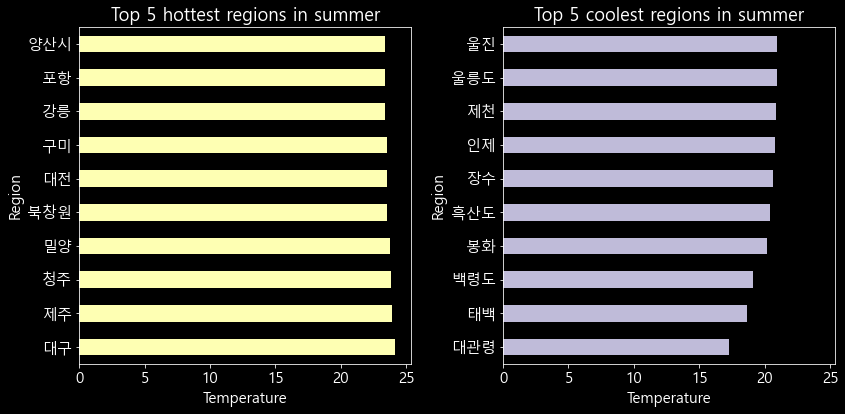

In [30]:
def plotTopTemp(k):
    """
    Plot top k hottest and coolest region in Korea
    """
    
    fig, axs = plt.subplots(1, 2, figsize=(12, 5), sharex=True)
    for i, x in enumerate(['hottest', 'coolest']):
        if (x=="coolest"):
            topK = df.groupby(["region_name"]).agg({'average_temperature': lambda x: x.mean(skipna=True)}) \
                                              .sort_values("average_temperature").head(k)
        else:
            topK = df.groupby(["region_name"]).agg({'average_temperature': lambda x: x.mean(skipna=True)}) \
                                              .sort_values("average_temperature", ascending=False).head(k) 
        topK.plot(kind="barh", 
                figsize=(12,6), 
                title=f"Top 5 {x} regions in summer", 
                color=color_pal[i+1], 
                ax=axs[i])
        print(f"Top {10} {x} regions during summer in Korea are:", list(topK.index))
        print("\n")
        axs[i].set_xlabel('Temperature')
        axs[i].get_legend().remove()
        axs[i].set_ylabel('Region')

    fig.tight_layout()
    plt.show()
    
plotTopTemp(10)

Seems like 대전 - the city where I live - lies among the top 6 hottest regions. No wonder :)

## Rain season in Korea 

In [41]:
rain_related_attribute = [a for a in list(df_short.columns) if "precipitation" in a]
rain_related_attribute.insert(0, "date")
rain_related_attribute.insert(0, "region_name")
df_rain = df[rain_related_attribute]
df_rain.head(10)


,region_name,date,monthly_precipitation,maximum_daily_precipitation,maximum_precipitation_per_hour,maximum_precipitation_for_10_minutes,highest_daily_precipitation_day,1_hour_highest_precipitation_day,10_min_maximum_precipitation_day
0,속초,2022-05,9.1,7.7,2.9,0.9,07,07,07
1,속초,2022-06,248.7,75.4,22.8,13.7,06,23,23
2,속초,2022-07,213.1,87.2,15.9,6.2,21,21,15
3,속초,2022-08,192.1,110.9,23.0,5.5,09,09,09
4,북춘천,2022-05,8.1,4.6,3.9,2.5,25,25,25
5,북춘천,2022-06,386.5,129.9,23.0,10.1,30,23,09
6,북춘천,2022-07,223.8,74.7,28.1,11.3,13,13,10
7,북춘천,2022-08,326.9,110.8,32.0,13.8,09,08,08
8,철원,2022-05,14.5,10.7,5.9,2.0,25,25,25
9,철원,2022-06,437.2,144.1,29.5,12.5,30,23,29


In [42]:
df_rain.isnull().sum() # make sure there are no NaN values

region_name                             0
date                                    0
monthly_precipitation                   0
maximum_daily_precipitation             0
maximum_precipitation_per_hour          0
maximum_precipitation_for_10_minutes    0
highest_daily_precipitation_day         0
1_hour_highest_precipitation_day        0
10_min_maximum_precipitation_day        0
dtype: int64

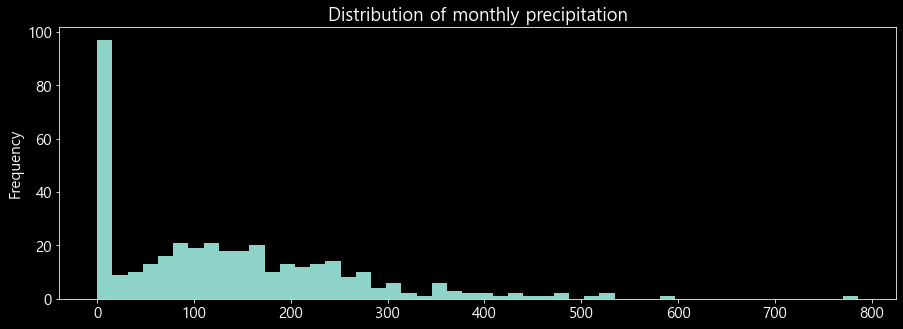

In [59]:
df_rain.monthly_precipitation.plot(kind="hist", bins=50, title="Distribution of monthly precipitation", figsize=(15,5))
plt.show()

In [52]:
df_rain.query("monthly_precipitation > 500")

,region_name,date,monthly_precipitation,maximum_daily_precipitation,maximum_precipitation_per_hour,maximum_precipitation_for_10_minutes,highest_daily_precipitation_day,1_hour_highest_precipitation_day,10_min_maximum_precipitation_day
13,동두천,2022-06,522.8,219.9,43.7,15.0,30,30,30
17,파주,2022-06,509.9,199.1,52.9,18.3,30,30,30
51,인천,2022-08,583.7,207.8,84.8,23.1,08,08,08
63,수원,2022-08,532.5,192.8,59.1,18.2,09,08,08
191,양평,2022-08,785.8,261.9,82.9,19.4,08,08,08


In [74]:
nameDict = {
    "monthly_precipitation": "Monthly Precipitation",
    "maximum_daily_precipitation": "Maximum Daily Precipitation",
    "maximum_precipitation_per_hour": "Maximum Precipitation per hour",
    "maximum_precipitation_for_10_minutes": "Maximum Precipitation for 10 minutes"
}

def plotRelation(prop1, prop2):
    df_rain.plot(kind="scatter", x=prop1, y=prop2, figsize=(12,5))
    plt.xlabel(nameDict[prop1])
    plt.ylabel(nameDict[prop2])
    plt.show()


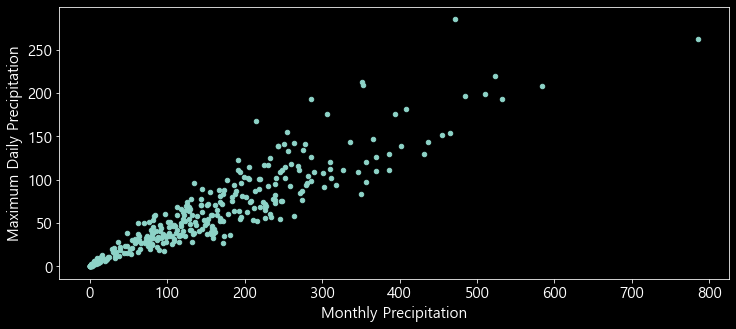

In [68]:
plotRelation("monthly_precipitation", "maximum_daily_precipitation")

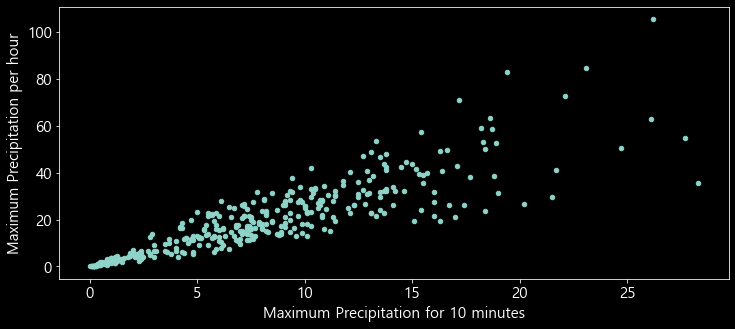

In [75]:
plotRelation("maximum_precipitation_for_10_minutes", "maximum_precipitation_per_hour")